In [60]:
import pandas as pd
from prettytable import PrettyTable
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
os.listdir('.')

['.git',
 '.ipynb_checkpoints',
 '2. numpy and pandas.ipynb',
 '3. exploratory data analysis.ipynb',
 '4. ML - Introduction.ipynb',
 '5. Diabetes Classification.ipynb',
 'basic_python',
 'creditapproval.xls - DT_NasabahKredit.csv',
 'data_for_eda_exercise',
 'data_for_pandas_exercise.xlsx',
 'pimadataorig.csv',
 'retail_raw_reduced_data_quality.csv']

### Data Understanding

In [3]:
df = pd.read_csv('pimadataorig.csv')

In [6]:
df.shape

(768, 9)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [16]:
table = PrettyTable()
table.field_names = ["Column Name", "Definition"]

table.add_row(["num_preg", "Number of times pregnant"])
table.add_row(["glucose_conc", 
               "Plasma glucose concentration a 2 hours in an oral glucose tolerance test"])
table.add_row(["diastolic_bp", "Diastolic blood pressure (mm Hg)"])
table.add_row(["skin_thickness", "Triceps skin fold thickness (mm)"])
table.add_row(["insulin", "2-Hour serum insulin (mu U/ml)"])
table.add_row(["bmi", "Body mass index"])
table.add_row(["diab_pred", "Diabetes pedigree function"])
table.add_row(["age", "Age (years)"])
table.add_row(["diabetes", "Diabetes status (0: No, 1: Yes)"])

print(table)

+----------------+--------------------------------------------------------------------------+
|  Column Name   |                                Definition                                |
+----------------+--------------------------------------------------------------------------+
|    num_preg    |                         Number of times pregnant                         |
|  glucose_conc  | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
|  diastolic_bp  |                     Diastolic blood pressure (mm Hg)                     |
| skin_thickness |                     Triceps skin fold thickness (mm)                     |
|    insulin     |                      2-Hour serum insulin (mu U/ml)                      |
|      bmi       |                             Body mass index                              |
|   diab_pred    |                        Diabetes pedigree function                        |
|      age       |                               Age (years)

In [20]:
# melihat nilai yang kosong dan tipe data untuk setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_preg        768 non-null    int64  
 1   glucose_conc    768 non-null    int64  
 2   diastolic_bp    768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   diab_pred       768 non-null    float64
 7   age             768 non-null    int64  
 8   diabetes        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


dapat dilihat bahwa kolom glucose_conc, diastolic_bp, skin_thickness, insulin, bmi mempunyai nilai minimum 0 yang secara logika tidak makesense, jadi lebih baik kita ubah nilai 0 tersebut dengan suatu value (mean, median, mode)

array([[<Axes: title={'center': 'num_preg'}>,
        <Axes: title={'center': 'glucose_conc'}>,
        <Axes: title={'center': 'diastolic_bp'}>],
       [<Axes: title={'center': 'skin_thickness'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'diab_pred'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

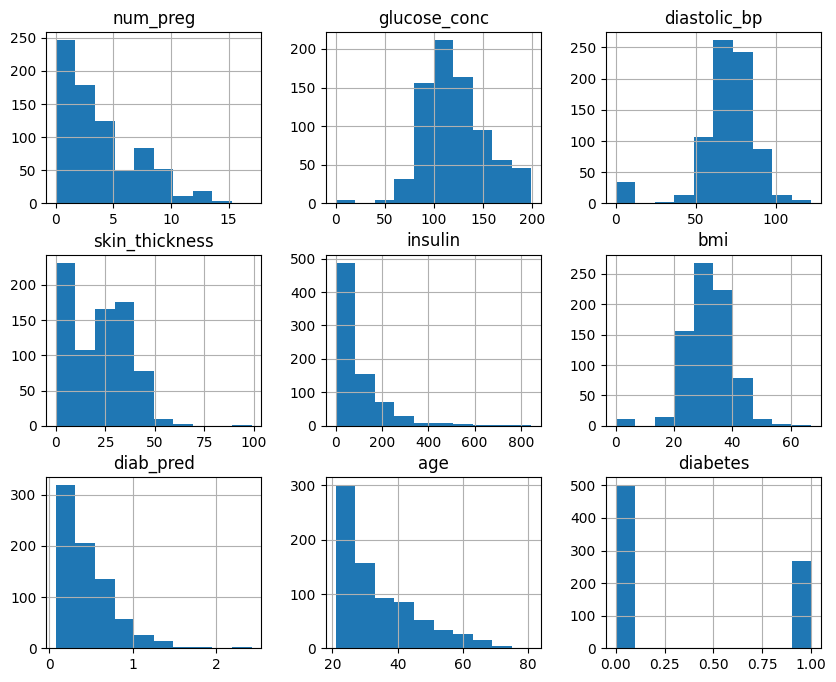

In [24]:
df.hist(figsize=(10, 8))

In [25]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [26]:
median = ['num_preg', 'skin_thickness', 'insulin'] #asymetric distribution: ganti nilai 0 dengan median
mean = ['glucose_conc', 'diastolic_bp', 'bmi'] #symetric distribution: ganti nilai 0 dengan mean

In [27]:
def replace_zero(df, column_name, fill):
    if fill=='median':
        fill_value = df[column_name].median()
    elif fill=='mean':
        fill_value = df[column_name].mean()
    df[column_name] = df[column_name].replace(0, fill_value)
    return df

In [28]:
for col in median:
    df = replace_zero(df, col, 'median')
    
for col in mean:
    df = replace_zero(df, col, 'mean')

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
glucose_conc,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
diastolic_bp,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
skin_thickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
bmi,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### melihat multicoliniearity antar variable

jika terdapat hubungan yang tinggi antar variable independent/features (X)/variable input
(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age'])
akan mengakibatkan model redundant (fitur (features) tidak memberikan kontribusi yang berarti atau tambahan dalam meningkatkan kualitas model atau prediksi)

<Axes: xlabel='glucose_conc', ylabel='insulin'>

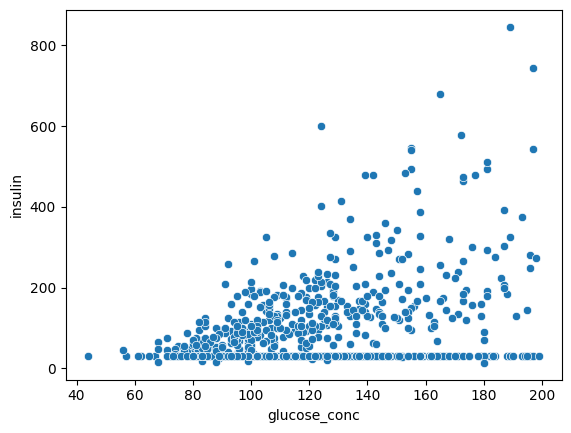

In [33]:
sns.scatterplot(df, x='glucose_conc', y='insulin')

In [34]:
df.corr() #pearson correlation

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.148929,0.246388,0.060706,-0.059580,0.080538,-0.016151,0.538169,0.245466
glucose_conc,0.148929,1.000000,0.219666,0.172361,0.357081,0.231478,0.137106,0.266600,0.492908
diastolic_bp,0.246388,0.219666,1.000000,0.152458,-0.022049,0.281231,0.000371,0.326740,0.162986
skin_thickness,0.060706,0.172361,0.152458,1.000000,0.238188,0.546958,0.142977,0.054514,0.189065
insulin,-0.059580,0.357081,-0.022049,0.238188,1.000000,0.189031,0.178029,-0.015413,0.148457
bmi,0.080538,0.231478,0.281231,0.546958,0.189031,1.000000,0.153508,0.025748,0.312254
diab_pred,-0.016151,0.137106,0.000371,0.142977,0.178029,0.153508,1.000000,0.033561,0.173844
age,0.538169,0.266600,0.326740,0.054514,-0.015413,0.025748,0.033561,1.000000,0.238356
diabetes,0.245466,0.492908,0.162986,0.189065,0.148457,0.312254,0.173844,0.238356,1.000000


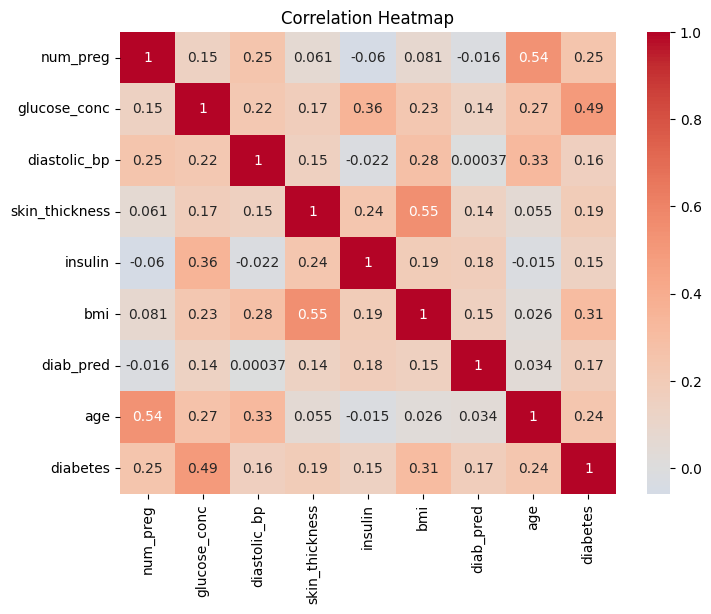

In [37]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

karena tidak ada nilai korelasi yang cukup tinggi, sehingga kita tidak perlu melakukan eliminasi kolom<br/>
berikut contoh correlation matrix yang memiliki nilai cukup tinggi
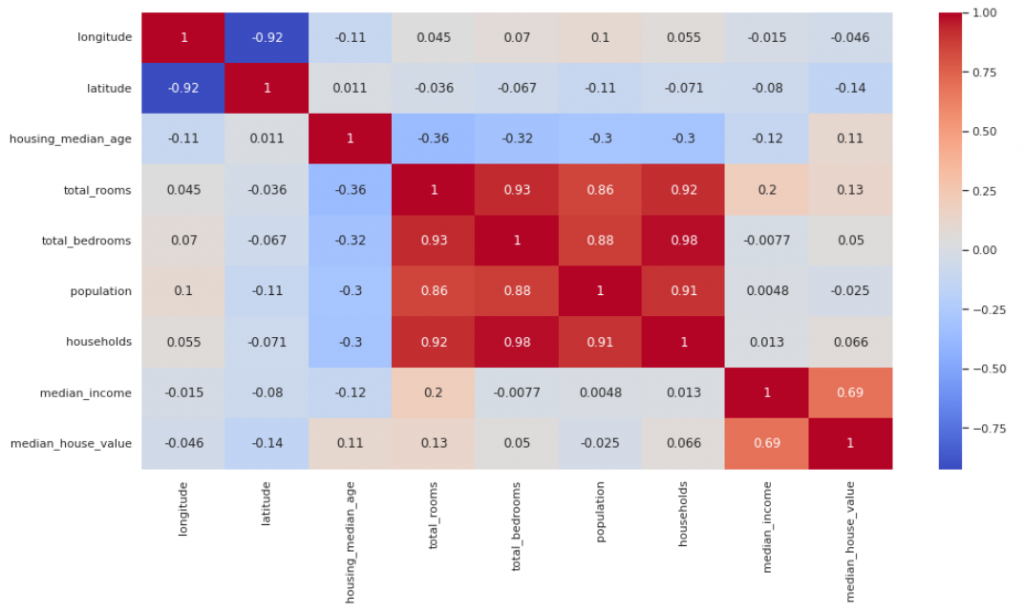

In [47]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

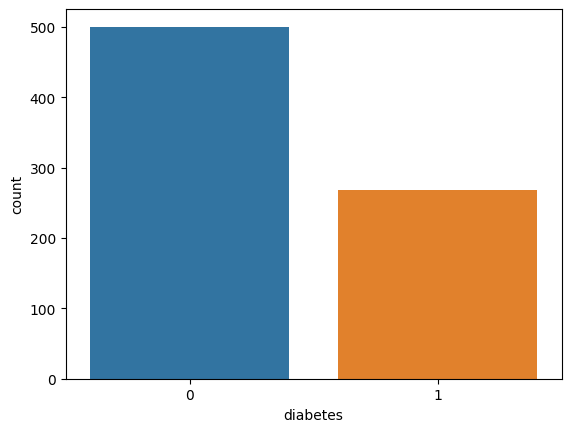

In [46]:
sns.countplot(df, x='diabetes')

### Split train test data

In [43]:
X = df[['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age']]
y = df['diabetes']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [52]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [56]:
y_test.value_counts()

diabetes
0    144
1     87
Name: count, dtype: int64

### Scaling Feature

In [57]:
df.head()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,3,137.0,40.0,35,168.0,43.1,2.288,33,1


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
glucose_conc,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
diastolic_bp,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
skin_thickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
bmi,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


bisa kita lihat bahwa rentang nilai pada features berbeda, hal ini akan mengakibatkan kontribusi features dalam model akan cenderung terlalu jomplang. (nilai yang memiliki rentang tinggi cenderung dominan dalam menentukan target). Oleh karena itu, perlu dilakukan scaling nilai:
- StandardScaler()
- MinMaxScaler()

In [63]:
scaler = StandardScaler()
scaler.fit(X_train) #lakukan fit pada X_train jangan libatkan X_test
X_train = scaler.transform(X_train)

In [70]:
pd.DataFrame(X_train, columns=df.columns[:-1]).describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,537.0,1.290092e-16,1.000932,-1.051000,-0.721142,-0.391284,0.598290,4.226727
glucose_conc,537.0,2.050915e-16,1.000932,-2.508327,-0.745257,-0.168253,0.665198,2.460323
diastolic_bp,537.0,6.285061e-17,1.000932,-3.932586,-0.680341,-0.029892,0.620557,4.035414
skin_thickness,537.0,7.939025e-17,1.000932,-2.169137,-0.460554,-0.353767,0.500524,7.655216
insulin,537.0,-1.984756e-17,1.000932,-0.750658,-0.606123,-0.487867,0.265466,6.537404
bmi,537.0,-2.745579e-16,1.000932,-2.109175,-0.702119,-0.065241,0.601259,5.133461
diab_pred,537.0,6.615854e-17,1.000932,-1.154989,-0.674852,-0.296744,0.402456,5.873017
age,537.0,-2.778659e-16,1.000932,-1.030465,-0.776281,-0.352640,0.664099,4.053226


In [71]:
X_test = scaler.transform(X_test)

In [77]:
pd.DataFrame(X_test, columns=df.columns[:-1]).describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,231.0,0.101361,0.985200,-1.051000,-0.391284,-0.391284,0.598290,3.237153
glucose_conc,231.0,-0.060443,0.914885,-2.091601,-0.713202,-0.136197,0.472863,2.396212
diastolic_bp,231.0,-0.030502,0.949056,-2.306463,-0.680341,-0.029892,0.457945,3.059741
skin_thickness,231.0,0.007735,0.950879,-2.169137,-0.460554,-0.460554,0.500524,3.490545
insulin,231.0,-0.146846,0.707609,-0.671821,-0.606123,-0.606123,0.226047,3.375156
bmi,231.0,0.005082,1.059851,-2.109175,-0.835419,-0.065241,0.616071,3.074716
diab_pred,231.0,0.089691,0.977876,-1.133983,-0.638842,-0.215721,0.648526,4.291566
age,231.0,0.022218,0.987846,-1.030465,-0.776281,-0.267911,0.537006,3.036488


### Training Model

In [128]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [129]:
def plot_confusion_matrix(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['non-diabetes', 'diabetes'])
    cmd.plot()

def train_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Classification report for train")
    print(classification_report(y_train, y_train_pred))
    print('-'*100)
    
    print("Classification report for test")
    print(classification_report(y_test, y_test_pred))
    print('-'*100)
    print('recall_score\t:', recall_score(y_test, y_test_pred))
    print('precision_score\t:', precision_score(y_test, y_test_pred))
    print('accuracy_score\t:', accuracy_score(y_test, y_test_pred))
    
    plot_confusion_matrix(y_test, y_test_pred)
    return y_test, y_test_pred

Classification report for train
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       356
           1       0.81      0.63      0.71       181

    accuracy                           0.83       537
   macro avg       0.82      0.78      0.79       537
weighted avg       0.83      0.83      0.82       537

----------------------------------------------------------------------------------------------------
Classification report for test
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       144
           1       0.75      0.46      0.57        87

    accuracy                           0.74       231
   macro avg       0.75      0.68      0.69       231
weighted avg       0.74      0.74      0.72       231

----------------------------------------------------------------------------------------------------
recall_score	: 0.45977011494252873
precision_score	: 0.7547169811320755
accuracy_

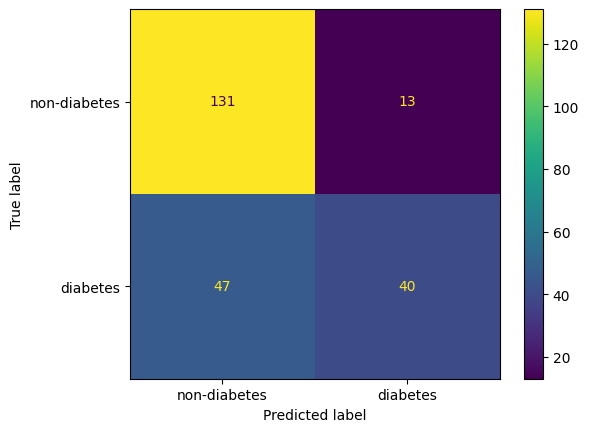

In [130]:
svc_model = SVC()
y_test_temp, y_test_pred = train_and_report(svc_model, X_train, X_test, y_train, y_test)

Positive -> positive diabetes<br/>
Negative -> Negative diabetes

False Positive => yang harusnya tidak diabetes terprediksi diabetes<br/>
False Negative => yang harusnya diabetes terprediksi tidak diabetes<br/>
True Positive => diabetes benar terprediksi diabetes<br/>
True Negative => tidak diabetes benar terprediksi tidak diabetes<br/>

In [125]:
FN = 47
FP = 13
TP = 40
TN = 131

In [126]:
precision = TP/(TP+FP)
precision

0.7547169811320755

In [127]:
recall = TP/(TP+FN)
recall

0.45977011494252873

kapan kita pake recall, precision, accuracy, f1-score?
0. Konsulatikan dengan stakeholders/management.
1. recall, precision, f1-score : ketika datanya imbalance
2. recall -> ketika cost akibat False Negative itu lebih besar (Fraud : nasabah yang harusnya fraud terdeteksi tidak fraud memberikan kerugian yang lebih besar, Covid: yang harusnya covid terprediksi tidak covid maka bisa memperparah penyebaran covid)
3. precision -> ketika cost akibat False Positive itu lebih besar (Spam: yang harusnya tidak spam terdeteksi spam-> mungkin ada email penting yang terabaikan)
4. f1-score -> ketika mempertimbangkan kedua-duanya (FP & FN)

contoh buruk pake accuracy:

1000 data transaksi kartu kredit, 1% (10) merupakan penipuan, 99% (990) bukan penipuan.
Ternyata model memprediksi semuanya (1000) bukan penipuan.

akurasi = total_prediksi_benar/total_data = 990/1000 = 99%
walaupun akurasinya itu sangat tinggi, tetapi model tidak bisa mendeteksi yang penipuan.

### Task
1. Coba training dengan algoritma lain (logistic regression, desicion tree, random forest, KNN, Naive Bayes) dan hitung metricnya.
2. Gunakan MinMaxScaler dalam dan run poin 1.